In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


%matplotlib inline

## Importing

In [2]:
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
diabetes_data.shape

(768, 9)

## Histogram all columns

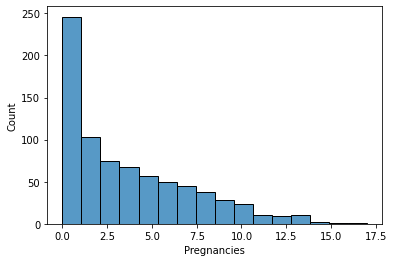

In [4]:
sns.histplot(data=diabetes_data["Pregnancies"])

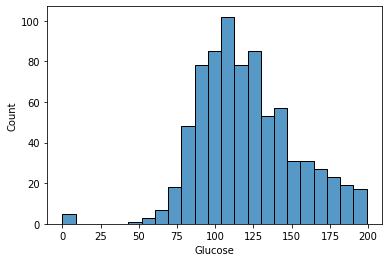

In [5]:
sns.histplot(data=diabetes_data["Glucose"])

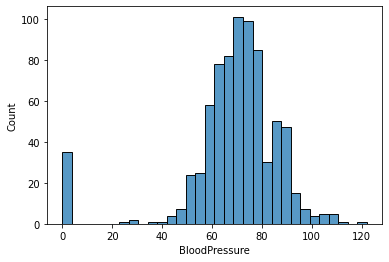

In [6]:
sns.histplot(data=diabetes_data["BloodPressure"])

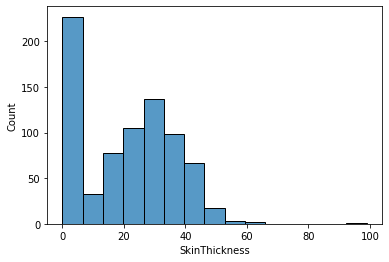

In [7]:
sns.histplot(data=diabetes_data["SkinThickness"])

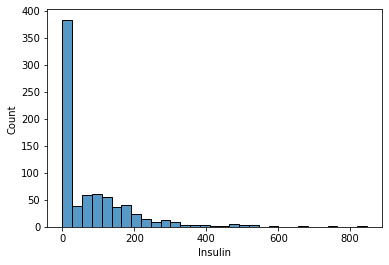

In [8]:
sns.histplot(data=diabetes_data["Insulin"])

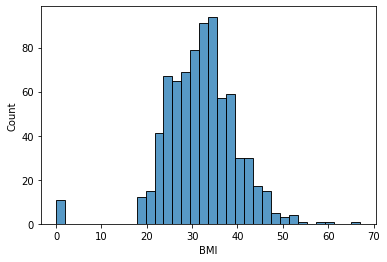

In [9]:
sns.histplot(data=diabetes_data["BMI"])

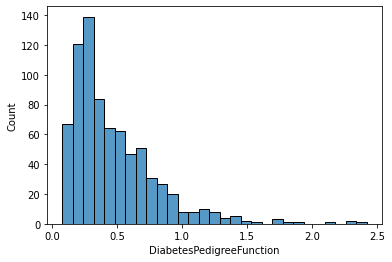

In [10]:
sns.histplot(data=diabetes_data["DiabetesPedigreeFunction"])

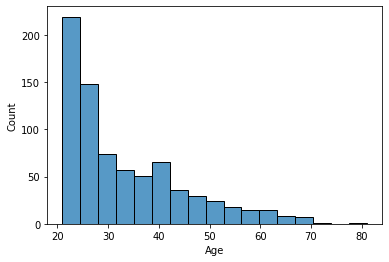

In [11]:
sns.histplot(data=diabetes_data["Age"])

## Correlation heatmap

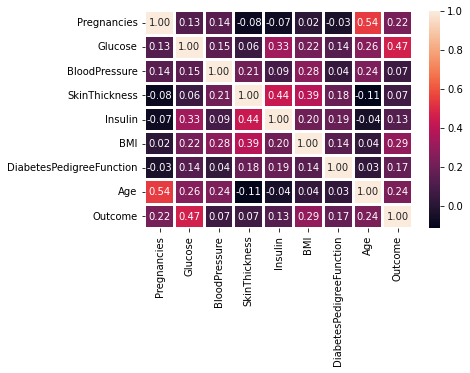

In [12]:
sns.heatmap(diabetes_data.corr(), annot = True, fmt = '.2f', linewidths = 2)

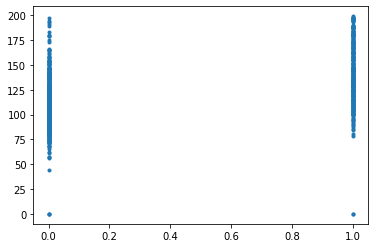

In [13]:
plt.scatter(diabetes_data["Outcome"], diabetes_data["Glucose"], marker='.')

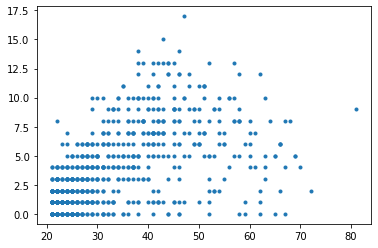

In [14]:
plt.scatter(diabetes_data["Age"], diabetes_data["Pregnancies"], marker='.')

## Normalisation check

In [15]:
diabetes_data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### standard normalisation

In [16]:
diabetes_norm = pd.DataFrame(preprocessing.normalize(diabetes_data, axis=0), columns=diabetes_data.columns)
diabetes_norm.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      0.04236  0.042708       0.036204       0.048579  0.000000  0.036798   
1      0.00706  0.024528       0.033187       0.040251  0.000000  0.029132   
2      0.05648  0.052808       0.032182       0.000000  0.000000  0.025518   
3      0.00706  0.025683       0.033187       0.031923  0.024208  0.030774   
4      0.00000  0.039534       0.020113       0.048579  0.043266  0.047202   

   DiabetesPedigreeFunction       Age   Outcome  
0                  0.039248  0.051173  0.061085  
1                  0.021971  0.031727  0.000000  
2                  0.042065  0.032751  0.061085  
3                  0.010454  0.021493  0.000000  
4                  0.143222  0.033774  0.061085

### normalisation scaled between 0 and 1

In [17]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))

diabetes_scaled = pd.DataFrame(scaler.fit_transform(diabetes_data), columns=diabetes_data.columns)
diabetes_scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0

## Training and testing

In [18]:
train_data, test_data, train_label, test_label = train_test_split(diabetes_scaled.iloc[:, :7],
                                                                  diabetes_scaled.iloc[:, 8],
                                                                  test_size=0.2,
                                                                  random_state=42
                                                                  )

In [19]:
train_data.shape,train_label.shape,test_data.shape,test_label.shape

((614, 7), (614,), (154, 7), (154,))

## kNN Classification

### checking appropriate value of k

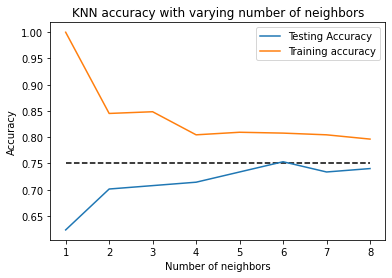

In [20]:
neighbors = np.arange(1, 9)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))


for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_data, train_label)
    train_accuracy[i] = knn.score(train_data, train_label)
    test_accuracy[i] = knn.score(test_data, test_label)
    

plt.title('KNN accuracy with varying number of neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.hlines(y=0.75, linestyles='--', xmin=1, xmax=8)

### classification with k=6

In [21]:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(train_data, train_label)
train_accuracy = knn.score(train_data, train_label)
test_accuracy = knn.score(test_data, test_label)

### validating classification

In [24]:
print("Training accuracy:", np.round(train_accuracy*100, 2), "%")
print("Testing accuracy:", np.round(test_accuracy*100, 2), "%")
print()

prediction = knn.predict(test_data)
print(classification_report(test_label, prediction))

Training accuracy: 80.78 %
Testing accuracy: 75.32 %

              precision    recall  f1-score   support

         0.0       0.76      0.91      0.83        99
         1.0       0.74      0.47      0.58        55

    accuracy                           0.75       154
   macro avg       0.75      0.69      0.70       154
weighted avg       0.75      0.75      0.74       154



Text(0.5, 1.0, 'Confusion Matrix')

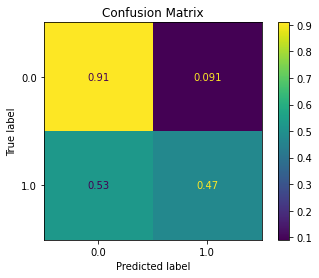

In [23]:
plot_confusion_matrix(knn, test_data, test_label, normalize='true')
plt.title('Confusion Matrix')